In [154]:
from torchxrayvision.datasets import XRayCenterCrop, XRayResizer
from torchxrayvision.datasets import NIH_Dataset
from torchxrayvision.models import DenseNet, ResNet
import torchvision.transforms as transforms
from torchvision.utils import make_grid
from torch.utils.data import Subset
import matplotlib.pyplot as plt
import numpy as np
import torch

In [155]:
import torch, torchvision
from torch import nn
from torchvision import transforms, models, datasets
import shap
import json
import numpy as np
import os

In [156]:
# paths for NIH dataset
IMAGE_PATH = '/home/akore/NIHCXR/images'
CSV_PATH = '/home/akore/NIHCXR/Data_Entry_2017.csv'

# load NIH dataset
dataset = NIH_Dataset(IMAGE_PATH, CSV_PATH, 
                      views=['AP', 'PA'], unique_patients=False, 
                      transform=transforms.Compose([XRayCenterCrop(),
                                                    XRayResizer(224, engine='cv2')]))

# grab random subset of 400 image indices from dataset
indices = list(range(50)) 
dataset = Subset(dataset, indices)

Setting XRayResizer engine to cv2 could increase performance.


In [157]:
model = DenseNet(weights="densenet121-res224-all").eval()

In [158]:
X = torch.concat([torch.tensor(img['img']) for img in dataset]).unsqueeze(1)
to_explain = torch.from_numpy(dataset[0]['img']).unsqueeze(0)

In [159]:
class_names = model.pathologies

In [160]:
e = shap.GradientExplainer((model, model.features), imgs)

In [161]:
shap_values, indexes = e.shap_values(to_explain, ranked_outputs=2, nsamples=200)

In [162]:
# get the names for the classes
index_names = np.vectorize(lambda x: class_names[x])(indexes)

In [163]:
# plot the explanations
shap_values = [np.swapaxes(np.swapaxes(s, 2, 3), 1, -1) for s in shap_values]

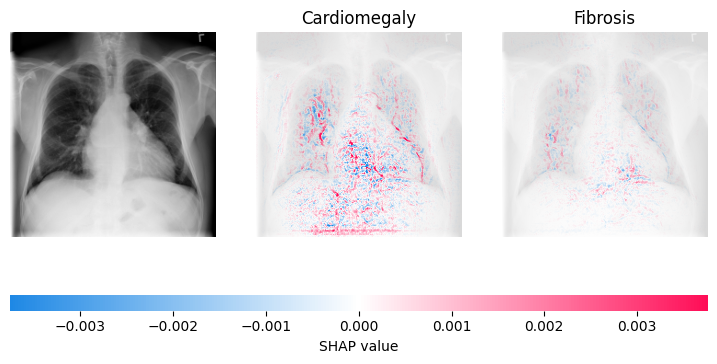

In [164]:
shap.image_plot(shap_values, np.array(to_explain[0]), index_names)